In [1]:
import pandas as pd
import sqlite3

In [2]:
db = sqlite3.connect('dataset.db')
cursor = db.cursor()

## Data Extraction

In [5]:
# cursor.execute('select name from sqlite_master')
# cursor.fetchall()

[('books',), ('ratings',), ('users',)]

In [44]:
# books = pd.read_sql('select * from books limit 3', db)
# books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [45]:
# ratings = pd.read_sql('select * from ratings limit 3', db)
# ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [46]:
# users = pd.read_sql('select * from users limit 3', db)
# users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [55]:
# df = pd.read_sql(
# ''' 
# select * from
# (SELECT * FROM users
# JOIN ratings ON users."User-ID" = ratings."User-ID") 
# as sq1 join books on books.ISBN = sq1.ISBN;
# ''', db)

In [56]:
# df.head(3)

,User-ID,Location,Age,User-ID:1,ISBN,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,2,0195153448,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,8,0002005018,5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,8,"timmins, ontario, canada",NaN,8,0060973129,0,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


## Data Cleaning

In [57]:
# df.columns

Index(['User-ID', 'Location', 'Age', 'User-ID:1', 'ISBN', 'Book-Rating',
       'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [58]:
# df.columns = ['User-ID', 'Location', 'Age', 'User-ID:1', 'ISBN', 'Book-Rating',
#        'ISBN2', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
#        'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

In [59]:
# df = df[['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
#        'Image-URL-S', 'Image-URL-M', 'Image-URL-L']]

In [60]:
# df.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,8,"timmins, ontario, canada",NaN,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [61]:
# df.shape

(951275, 12)

In [62]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951275 entries, 0 to 951274
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              951275 non-null  int64  
 1   Location             951275 non-null  object 
 2   Age                  695730 non-null  float64
 3   ISBN                 951275 non-null  object 
 4   Book-Rating          951275 non-null  int64  
 5   Book-Title           951275 non-null  object 
 6   Book-Author          951273 non-null  object 
 7   Year-Of-Publication  951275 non-null  int64  
 8   Publisher            951273 non-null  object 
 9   Image-URL-S          951275 non-null  object 
 10  Image-URL-M          951275 non-null  object 
 11  Image-URL-L          951275 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 87.1+ MB


> Saving cleaned data into database

In [63]:
# df.to_sql('cleaned_data', db, if_exists='fail', index=False)

951275

In [4]:
df = pd.read_sql('select * from cleaned_data', db)

> Value count in User-ID

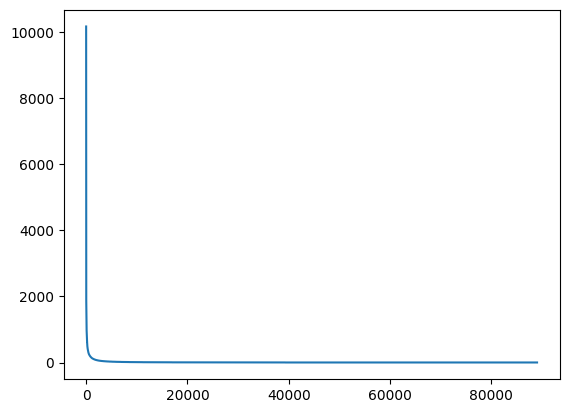

In [5]:
df['User-ID'].value_counts().reset_index(drop=True).plot();

In [69]:
# df['User-ID'].value_counts().plot(kind='bar');